In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler


بخش اول


In [3]:
data = pd.read_csv('df_clustering.csv')
data


,Address,year,income,cost
0,11505188611,1398,2.000000e+08,5.721200e+07
1,11505188614,1398,3.725900e+08,1.351200e+08
2,11505188617,1398,2.060000e+09,1.500800e+08
3,11505188620,1398,6.460000e+08,2.178820e+08
4,11505188623,1398,4.275000e+08,1.252000e+08
...,...,...,...,...
151819,23006709526,1401,8.932000e+08,3.995280e+08
151820,10001000141,1401,1.869600e+10,5.218300e+08
151821,10001000126,1401,5.326000e+09,1.218760e+09
151822,10001000132,1401,2.657100e+09,1.637200e+08


In [4]:
data.describe()


,Address,year,income,cost
count,1.518240e+05,151824.000000,1.320420e+05,1.518240e+05
mean,1.634017e+10,1399.497695,9.838739e+08,2.172342e+08
std,5.038920e+09,1.120195,3.421226e+09,7.372693e+08
min,1.000100e+10,1398.000000,0.000000e+00,5.000000e+05
25%,1.150319e+10,1398.000000,2.169000e+08,4.053000e+07
50%,1.290736e+10,1400.000000,4.386000e+08,9.470478e+07
75%,2.130954e+10,1400.000000,9.526375e+08,2.128978e+08
max,2.300671e+10,1401.000000,5.405600e+11,8.139810e+10


In [7]:
data.isnull().sum()


Address        0
year           0
income     19782
cost           0
dtype: int64

هندل کردن مقادیر گمشده ستون درآمد


In [6]:
imputer = KNNImputer(n_neighbors=5)

# Apply the imputer on income and cost columns
data[['income']] = imputer.fit_transform(data[['income']])

# Checking again for missing values
data.isnull().sum()



KeyboardInterrupt



In [6]:
data

,Address,year,income,cost
0,11505188611,1398,2.000000e+08,5.721200e+07
1,11505188614,1398,3.725900e+08,1.351200e+08
2,11505188617,1398,2.060000e+09,1.500800e+08
3,11505188620,1398,6.460000e+08,2.178820e+08
4,11505188623,1398,4.275000e+08,1.252000e+08
...,...,...,...,...
151819,23006709526,1401,8.932000e+08,3.995280e+08
151820,10001000141,1401,1.869600e+10,5.218300e+08
151821,10001000126,1401,5.326000e+09,1.218760e+09
151822,10001000132,1401,2.657100e+09,1.637200e+08


بدلیل تفاوت زیاد بین ستون های هزینه و درآمد مقیاس بندی انجام می دهیم


In [7]:
scaler = MinMaxScaler()

# Apply MinMaxScaler to income and cost columns
data[['income', 'cost']] = scaler.fit_transform(data[['income', 'cost']])

# Display first few rows after scaling
data.head()


,Address,year,income,cost
0,11505188611,1398,0.000370,0.000697
1,11505188614,1398,0.000689,0.001654
2,11505188617,1398,0.003811,0.001838
3,11505188620,1398,0.001195,0.002671
4,11505188623,1398,0.000791,0.001532


In [9]:
kmeans = KMeans(n_clusters=10, random_state=42, n_init='auto')
data['cluster'] = kmeans.fit_predict(data[['income', 'cost']])


In [10]:
data


,Address,year,income,cost,cluster
0,11505188611,1398,0.000370,0.000697,0
1,11505188614,1398,0.000689,0.001654,0
2,11505188617,1398,0.003811,0.001838,0
3,11505188620,1398,0.001195,0.002671,0
4,11505188623,1398,0.000791,0.001532,0
...,...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902,4
151820,10001000141,1401,0.034586,0.006405,7
151821,10001000126,1401,0.009853,0.014967,4
151822,10001000132,1401,0.004915,0.002005,0


In [11]:
cluster_means = data.groupby('cluster')[['income', 'cost']].mean()
cluster_means


,income,cost
cluster,,
0,0.001079,0.001176
1,0.014722,0.421708
2,0.004771,0.078578
3,0.121049,0.010883
4,0.003801,0.006204
5,0.828345,0.008457
6,0.005851,0.192262
7,0.030025,0.005720
8,0.305032,0.021430


نام گذاری خوشه ها برای درک بهتر نمودار نهایی


In [12]:
# Creating a labeling function based on cluster means
def label_cluster(row):
    if row['cluster'] == 0:
        return 'Very Low Income, Very Low Cost'
    elif row['cluster'] == 1:
        return 'Low Income, Medium Cost'
    elif row['cluster'] == 2:
        return 'Low Income, Low Cost'
    elif row['cluster'] == 3:
        return 'Medium Income, Very Low Cost'
    elif row['cluster'] == 4:
        return 'Very Low Income, Very Low Cost'
    elif row['cluster'] == 5:
        return 'Very High Income, Low Cost'
    elif row['cluster'] == 6:
        return 'Low Income, Relatively Low Cost'
    elif row['cluster'] == 7:
        return 'Relatively Low Income, Very Low Cost'
    elif row['cluster'] == 8:
        return 'Medium Income, Low Cost'
    elif row['cluster'] == 9:
        return 'Low Income, Relatively Low Cost'



In [13]:
data['cluster_label'] = data.apply(label_cluster, axis=1)


In [14]:
centers = kmeans.cluster_centers_


In [15]:
data


,Address,year,income,cost,cluster,cluster_label
0,11505188611,1398,0.000370,0.000697,0,"Very Low Income, Very Low Cost"
1,11505188614,1398,0.000689,0.001654,0,"Very Low Income, Very Low Cost"
2,11505188617,1398,0.003811,0.001838,0,"Very Low Income, Very Low Cost"
3,11505188620,1398,0.001195,0.002671,0,"Very Low Income, Very Low Cost"
4,11505188623,1398,0.000791,0.001532,0,"Very Low Income, Very Low Cost"
...,...,...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902,4,"Very Low Income, Very Low Cost"
151820,10001000141,1401,0.034586,0.006405,7,"Relatively Low Income, Very Low Cost"
151821,10001000126,1401,0.009853,0.014967,4,"Very Low Income, Very Low Cost"
151822,10001000132,1401,0.004915,0.002005,0,"Very Low Income, Very Low Cost"


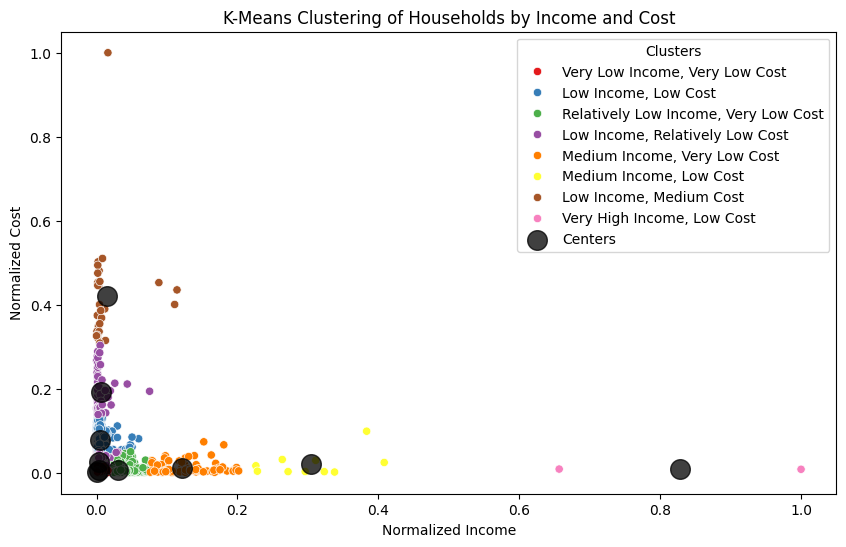

In [16]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x=data['income'], y=data['cost'], hue=data['cluster_label'], palette='Set1', legend='full')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.75, label='Centers')
plt.title('K-Means Clustering of Households by Income and Cost')
plt.xlabel('Normalized Income')
plt.ylabel('Normalized Cost')
plt.legend(title='Clusters')
plt.show()


بدست آوردن تعداد موجود از هر برچسب برای رسم نمودار با جزئیات بیشتر


In [17]:
cluster_sizes = data['cluster'].value_counts().to_dict()
cluster_sizes


{0: 125308,
 4: 22847,
 9: 2244,
 7: 896,
 2: 328,
 3: 94,
 6: 66,
 1: 29,
 8: 10,
 5: 2}

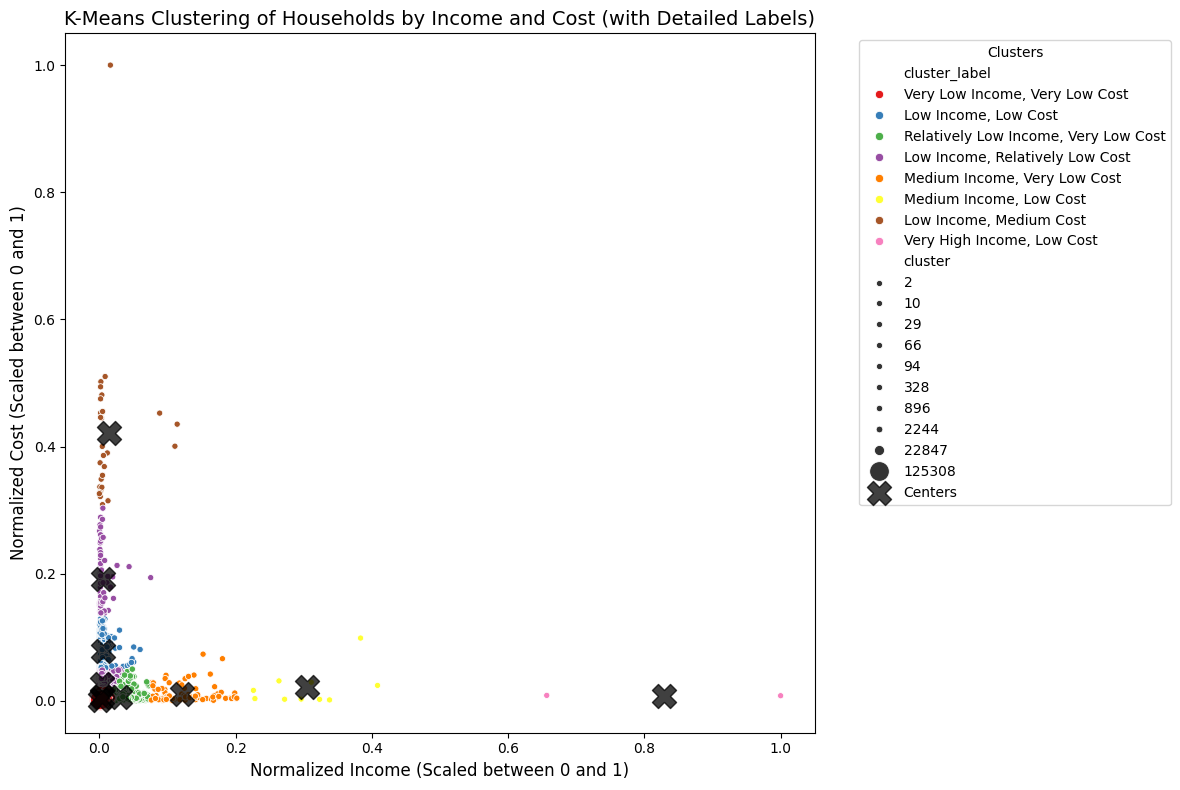

In [18]:
plt.figure(figsize=(12, 8))

# Scatter plot with cluster size-based markers
sns.scatterplot(x=data['income'], y=data['cost'], hue=data['cluster_label'], palette='Set1', 
                size=data['cluster'].map(cluster_sizes), sizes=(20, 200), legend='full')

# Marking cluster centers
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=300, alpha=0.75, label='Centers', marker='X')

# Adding titles and labels
plt.title('K-Means Clustering of Households by Income and Cost (with Detailed Labels)', fontsize=14)
plt.xlabel('Normalized Income (Scaled between 0 and 1)', fontsize=12)
plt.ylabel('Normalized Cost (Scaled between 0 and 1)', fontsize=12)
plt.legend(title='Clusters', bbox_to_anchor=(1.05, 1), loc='upper left', fontsize=10)

# Display the plot
plt.tight_layout()
plt.show()


### <div dir="rtl" style="font-family: 'Segoe UI', Tahoma, sans-serif; font-size: 20px; color: #ffffff; font-weight: bold; padding: 10px; border-radius: 8px; background: linear-gradient(135deg, #2EA149, #60a5fa); text-align: right;"> مشخص کردن مقدار کلاستر ها </div>

In [19]:
wcss = []
for k in range(1, 21):
    kmeans = KMeans(n_clusters=k, random_state=42, n_init='auto')
    kmeans.fit(data[['income', 'cost']])
    wcss.append(kmeans.inertia_) 

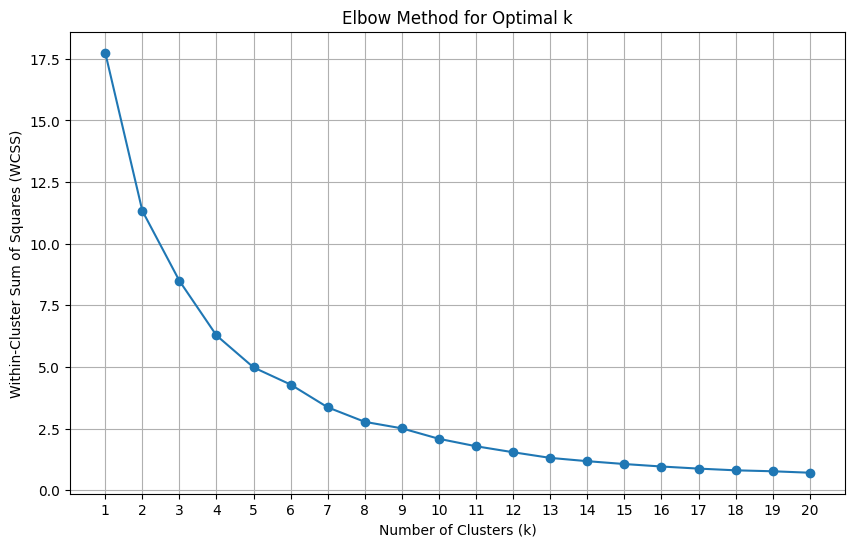

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.xticks(range(1, 21))
plt.grid(True)
plt.show() 

In [22]:
data

,Address,year,income,cost,cluster,cluster_label
0,11505188611,1398,0.000370,0.000697,0,"Very Low Income, Very Low Cost"
1,11505188614,1398,0.000689,0.001654,0,"Very Low Income, Very Low Cost"
2,11505188617,1398,0.003811,0.001838,0,"Very Low Income, Very Low Cost"
3,11505188620,1398,0.001195,0.002671,0,"Very Low Income, Very Low Cost"
4,11505188623,1398,0.000791,0.001532,0,"Very Low Income, Very Low Cost"
...,...,...,...,...,...,...
151819,23006709526,1401,0.001652,0.004902,4,"Very Low Income, Very Low Cost"
151820,10001000141,1401,0.034586,0.006405,7,"Relatively Low Income, Very Low Cost"
151821,10001000126,1401,0.009853,0.014967,4,"Very Low Income, Very Low Cost"
151822,10001000132,1401,0.004915,0.002005,0,"Very Low Income, Very Low Cost"


In [ ]:
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

eps_values = [0.3, 0.5, 0.7]  # adjust based on your data
min_samples_values = [3, 5, 10]

for eps in eps_values:
    for min_samples in min_samples_values:
        # Apply DBSCAN with varying hyperparameters
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        data['dbscan_cluster'] = dbscan.fit_predict(data[['income', 'cost']])

        # Plot the clusters
        plt.figure(figsize=(10, 6))
        palette = sns.color_palette("hsv", as_cmap=True)
        sns.scatterplot(x='income', y='cost', hue='dbscan_cluster', palette=palette, data=data)
        plt.title(f'DBSCAN Clustering of Income and Cost (eps={eps}, min_samples={min_samples})')
        plt.show()
